# 0. Data Scaling: 

> 너무 크거나 동떨어진 값을 일정한 범위 안으로 모아 놓는 데이터 전처리 과정



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

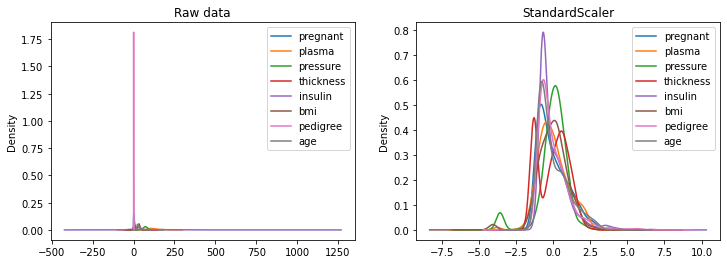

In [ ]:
# 피마 인디언의 당뇨병 데이터셋
targetULR_pimaIndiansDiabetes3 = "https://raw.githubusercontent.com/taehojo/data/master/pima-indians-diabetes3.csv"
df = pd.read_csv(targetULR_pimaIndiansDiabetes3)

X = df.iloc[:,0:8]
y = df.iloc[:,8]  #당뇨 여부

ss = StandardScaler()           #일반적으로 많이 사용되는 데이터 스케일링 함수
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

데이터 스케일링으로 데이터가 0 중심으로 모이며 그래프간 차이가 심하지 않다.

# 1. Decision tree: 

> yes or no 질문을 반복해서 분류하는 방법



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 학습 환경 설정
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 성정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 71.70%
Standard Deviation: 5.07%


# 2. Random Forest:

> 결정 트리를 여러개 묶어 놓은것(과집합에 빠지기 쉬운 결정 트리의 단점을 보완해준다.)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 학습 환경 설정
classifier = RandomForestClassifier(n_estimators=50)  # 50개의 결정 트리
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 73.78%
Standard Deviation: 2.65%


# 3. 가우시안 나이브 베이즈(gaussian naive bayes):

> 베이즈 정리를 기반으로 각 범주에 속할 확률을 계산하는 방법


> 평균과 표준편차로 목표 데이터가 각 범주에 속할 확률을 계산하고, 가장 높은 확률을 가지는 범주로 데이터 분류.




In [ ]:
from sklearn.naive_bayes import GaussianNB

# 학습 환경 설정
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.16%
Standard Deviation: 2.81%


- 베이즈 정리란 조건부 확률을 계산하는 방법의 하나이다. 이전의 경험과 현재의 정보를 근거로 확률을 구해 가는 방법이라고 할 수 있다.

- 베이즈 정리를 통해 데이터가 특정한 클래스에 속할 확률을 계산하는 것을 '베이즈 분류'라고하며, 예측할 속성들이 *상호 독립적*일 때 이를 '나이브 베이즈 분류'라고 한다.

- 여기에 해당 데이터가 연속적으로 분포하고 있을 경우, 가우시안 나이브 베이즈 분류를 사용하는 것이다.

# 4. K-nearest neighbor(k-최근접 이웃, KNN):

> 새로운 데이터가 입력되면 가장 가까이 있는 것 k개 중에 많이 속한 종류로 분류해주는 것.


In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

# 학습 환경 설정
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 69.30%
Standard Deviation: 4.98%


최적의 k값을 정하는 것이 중요하다.

# 5. Ada Boost:

> 여러 번의 분류를 통해 정답을 예측하는 알고리즘(잘못 예측된 것에 가중치를 두고 다시 분류를 반복한다.)



In [ ]:
from  sklearn.ensemble import AdaBoostClassifier

# 학습 환경 설정
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 72.75%
Standard Deviation: 2.96%


# 6. 이차 판별 분석(Quadratic discriminant Analysis):

> 각 클래스 간의 경계를 결정해 분류하는 방법(경계가 직선이면 선형 판별 분석, 2차 방정식에 의한 곡선이면 이차 판별 분석이다.)



In [ ]:
from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 학습 환경 설정
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 73.24%
Standard Deviation: 3.76%


discriminant analysis(판별 분석)에는 선형으로 경계를 정하는 선형 판별 분석이 있지만 한계로 인해 성능이 좋지 않을 수 있다. 이차 판별 분석은 더 많은 데이터와 연산량이 필요하지만 비선형 분류가 가능한 장점이 있다.

# 7. Support Vector Machine:

> 분류를 위한 기준선을 정의하는 모델. 경계선을 만들 때 사용되는 데이터를 **'서포트 벡터'**라고 하며, 경계선과 서포트 벡터 사이의 공간을 **'마진'**이라고 한다.

- 마진이 최대화 되는 경계를 찾아 분류하는 방법



In [ ]:
from  sklearn.svm import SVC  #support vector classifier

# 학습 환경 설정
classifier = SVC(kernel='linear') # linear: 일반적인 선형 SVM
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.70%
Standard Deviation: 4.43%


# 8. 서포트 벡터 머신 - **RBF커널**(Support Vector Machine Using Radial Basis Functions Kernel):

> 주어진 데이터가 선형으로 분리될 수 없는 경우를 해결하기 위해 만들어짐.(2차원에서는 선으로 분리 불가능 한것을 3차원에서는 면으로 분리 가능)

In [ ]:
from  sklearn.svm import SVC  #support vector classifier

# 학습 환경 설정
classifier = SVC(kernel='rbf') # rbf: RBF(방사형) 커널
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 74.13%
Standard Deviation: 1.99%


# 9. Voting:

> 여러 가지 다른 유형의 알고리즘을 같은 데이터셋에 적용해 학습하는 방법. 학습 결과를 모아 다수의 분류기가 결정한 결과를 선택하거나 클래스별 평균을 종합해 예측.(단일 알고리즘의 단점을 극복)



In [ ]:
from  sklearn.ensemble import VotingClassifier

# 학습 환경 설정
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 76.06%
Standard Deviation: 5.37%


# 10. Bagging:

> 데이터 세트를 여러 개로 분리해 분류하는 방법. 보팅과는 달리 하나의 알고리즘을 사용하고, 부스팅과 차이는 각 분류기를 제각각 분류한다는 것이다.

- 배깅 방식은 단일 분류기를 여러 번 사용함으로써 정확도를 높이고 과적합을 방지하는 효과가 있다.



In [ ]:
from  sklearn.ensemble import BaggingClassifier

# 학습 환경 설정
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)

# 테스트셋 적용
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경 설정
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 74.66%
Standard Deviation: 4.20%


분류기를 n번 반복해서 학습하면 그때마다 학습셋, 데이터셋을 새롭게 만든다. 맵처음 데이터가 n번의 서로 다른 학습셋, 데이터셋으로 분리될 때는 **'부트스트랩(bootstrap)'** 기법을 사용한다.

# 여러 알고리즘 성능을 한눈에 비교하기

Mean accuracy of D_tree : 67.36 %
Mean accuracy of RF : 74.83 %
Mean accuracy of GNB : 74.66 %
Mean accuracy of KNN : 71.03 %
Mean accuracy of Ada : 75.20 %
Mean accuracy of QDA : 75.52 %
Mean accuracy of SVM_l : 74.15 %
Mean accuracy of SVM_k : 73.27 %
Mean accuracy of Voting : 73.77 %
Mean accuracy of Bagging : 76.19 %


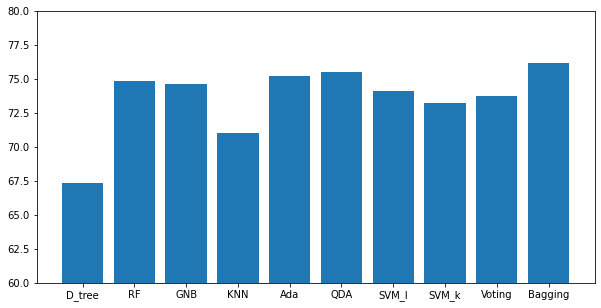

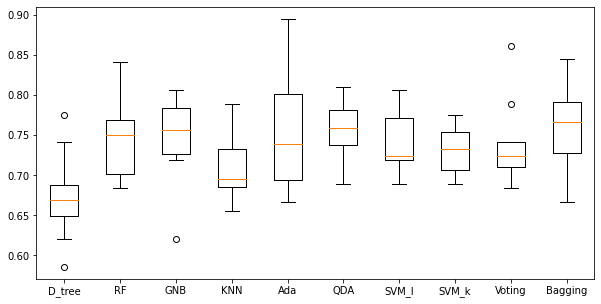

In [44]:
# 사용할 분류기를 모두 지정합니다.
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 분류기의 이름을 지정합니다. 
classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행하여 결과를 저장합니다. 
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다. 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다. 
    accuracies=cross_val_score(classifier, X = X_train, y = y_train, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()